### 1. Importing the Libraries

In [249]:
import pandas as pd
import h5py
import numpy as np

### 2. Importing the Dataset

In [250]:
data = pd.read_csv('heart.csv')

### 3. Taking Care of Missing Values

In [251]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 4. Taking Care of Duplicate Values

In [252]:
data_dup = data.duplicated().any()

In [253]:
data_dup

True

In [254]:
data = data.drop_duplicates()

In [255]:
data_dup = data.duplicated().any()

In [256]:
data_dup

False

### 5. Data Processing

In [257]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [258]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [259]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 6. Encoding Categorical Data

In [260]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [261]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [262]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [263]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


### 7. Feature Scaling

In [264]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [265]:
from sklearn.preprocessing import StandardScaler

In [266]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [267]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


### 8. Splitting The Dataset Into The Training Set And Test Set

In [268]:
X = data.drop('target',axis=1)

In [269]:
y = data['target']

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [272]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

### 9. Logistic Regression

In [273]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [274]:
from sklearn.linear_model import LogisticRegression

In [275]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [276]:
y_pred1 = log.predict(X_test)

In [277]:
from sklearn.metrics import accuracy_score

In [278]:
accuracy_score(y_test,y_pred1)

0.9016393442622951

### 10. SVC

In [279]:
from sklearn import svm

In [280]:
svm = svm.SVC()

In [281]:
svm.fit(X_train,y_train)

SVC()

In [282]:
y_pred2 = svm.predict(X_test)

In [283]:
accuracy_score(y_test,y_pred2)

0.8688524590163934

### 11. KNeighbors Classifier

In [284]:
from sklearn.neighbors import KNeighborsClassifier

In [285]:
knn = KNeighborsClassifier()

In [286]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [287]:
y_pred3=knn.predict(X_test)

In [288]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [289]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [290]:
score

[0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426]

In [291]:
import matplotlib.pyplot as plt

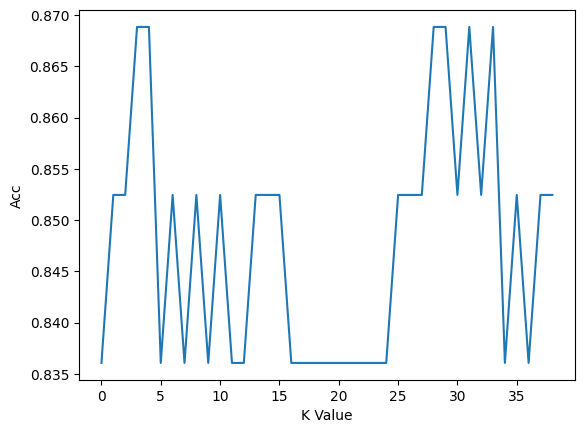

In [292]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [293]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

### Non-Linear ML Algorithms

In [294]:
data = pd.read_csv('heart.csv')

In [295]:
data = data.drop_duplicates()

In [296]:
X = data.drop('target',axis=1)
y=data['target']

In [297]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

### 12. Decision Tree Classifier

In [298]:
from sklearn.tree import DecisionTreeClassifier

In [299]:
dt = DecisionTreeClassifier()

In [300]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [301]:
y_pred4= dt.predict(X_test)

In [302]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

### 13. Random Forest Classifier

In [303]:
from sklearn.ensemble import RandomForestClassifier

In [304]:
rf = RandomForestClassifier()

In [305]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [306]:
y_pred5= rf.predict(X_test)

In [307]:
accuracy_score(y_test,y_pred5)

0.8688524590163934

### 14. Gradient Boosting Classifier

In [308]:
from sklearn.ensemble import GradientBoostingClassifier

In [309]:
gbc = GradientBoostingClassifier()

In [310]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [311]:
y_pred6 = gbc.predict(X_test)

In [312]:
accuracy_score(y_test,y_pred6)

0.8524590163934426

In [313]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [314]:
final_data

,Models,ACC
0,LR,90.163934
1,SVM,86.885246
2,KNN,86.885246
3,DT,78.688525
4,RF,86.885246
5,GB,85.245902


In [315]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

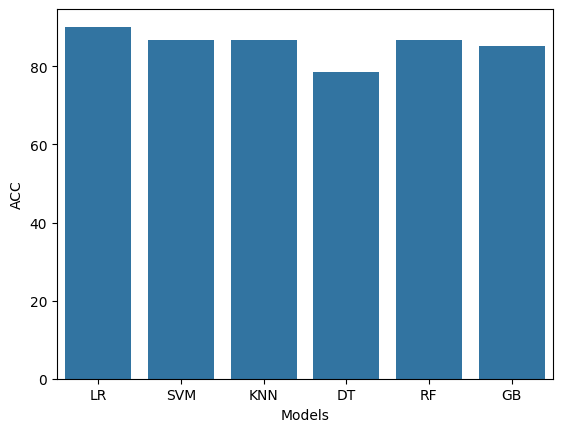

In [316]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

In [317]:
X=data.drop('target',axis=1)
y=data['target']

In [318]:
from sklearn.ensemble import RandomForestClassifier

In [319]:
import pandas as pd

In [320]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [321]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [322]:
y_pred = rf.predict(X_test)


In [323]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8852459016393442


In [324]:
pip install h5py


Note: you may need to restart the kernel to use updated packages.


In [325]:
import pickle

In [326]:
with h5py.File('random_forest_model.h5', 'w') as h5f:
    model_data = pickle.dumps(rf)
    h5f.create_dataset('model', data=np.void(model_data))


In [327]:
print("Model saved in HDF5 format")

Model saved in HDF5 format


In [328]:
new_data = pd.DataFrame({
    'age': [52],
    'sex': [1],
    'cp': [0],
    'trestbps': [125],
    'chol': [212],
    'fbs': [0],
    'restecg': [1],
    'thalach': [168],
    'exang': [0],
    'oldpeak': [1.0],
    'slope': [2],
    'ca': [2],
    'thal': [3]},index=[0])


In [329]:
predictions=rf.predict(new_data)

In [330]:


# Interpret the prediction
predicted_class = predictions[0]
if predicted_class == 0:
    print("No heart disease")
else:
    print("Possibility of heart disease")

No heart disease


In [331]:
with h5py.File('random_forest_model.h5', 'r') as h5f:
    model_data = h5f['model'][()]
    rf_loaded = pickle.loads(model_data.tobytes())

In [332]:
new_data = pd.DataFrame({
    'age': [52],
    'sex': [1],
    'cp': [0],
    'trestbps': [125],
    'chol': [212],
    'fbs': [0],
    'restecg': [1],
    'thalach': [168],
    'exang': [0],
    'oldpeak': [1.0],
    'slope': [2],
    'ca': [2],
    'thal': [3]
})

In [333]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [336]:
predictions = rf.predict(new_data)

# Interpret the prediction
predicted_class = predictions[0]
if predicted_class == 0:
    print("No heart disease")
else:
    print("Possibility of heart disease")

No heart disease
